### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
#tf.set_random_seed(42)

In [3]:
tf.__version__

'2.0.0'

### Collect Data

In [0]:
#import keras

In [0]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
from keras.utils import to_categorical
data=trainY
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

Using TensorFlow backend.


In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

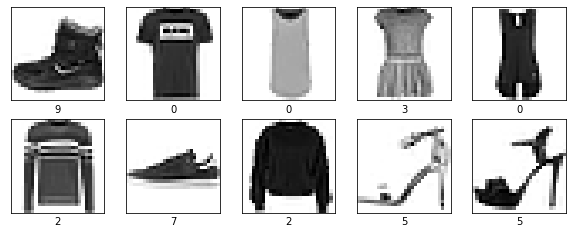

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(data[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [11]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 2041.7889 - accuracy: 0.7405 - val_loss: 2445.3288 - val_accuracy: 0.7645
Epoch 2/10
60000/60000 [==============================] - 6s 106us/sample - loss: 1651.3045 - accuracy: 0.7749 - val_loss: 989.2651 - val_accuracy: 0.8004
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 1542.7042 - accuracy: 0.7869 - val_loss: 3238.7930 - val_accuracy: 0.7238
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 1518.4099 - accuracy: 0.7876 - val_loss: 3103.2194 - val_accuracy: 0.6540
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 1495.3905 - accuracy: 0.7912 - val_loss: 1182.9754 - val_accuracy: 0.8099
Epoch 6/10
60000/60000 [==============================] - 6s 105us/sample - loss: 1505.1376 - accuracy: 0.7966 - val_loss: 6060.8078 - val_accuracy: 0.5875
Epoch 7/10
6000


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [13]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.5952 - accuracy: 0.7958 - val_loss: 0.5112 - val_accuracy: 0.8242
Epoch 2/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4902 - accuracy: 0.8305 - val_loss: 0.4859 - val_accuracy: 0.8323
Epoch 3/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4683 - accuracy: 0.8379 - val_loss: 0.4768 - val_accuracy: 0.8332
Epoch 4/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4579 - accuracy: 0.8410 - val_loss: 0.4738 - val_accuracy: 0.8368
Epoch 5/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4499 - accuracy: 0.8452 - val_loss: 0.4661 - val_accuracy: 0.8382
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4438 - accuracy: 0.8467 - val_loss: 0.4662 - val_accuracy: 0.8391
Epoch 7/10
60000/60000 [==========================

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.6064 - accuracy: 0.7887 - val_loss: 0.5209 - val_accuracy: 0.8219
Epoch 2/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4916 - accuracy: 0.8300 - val_loss: 0.5042 - val_accuracy: 0.8268
Epoch 3/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.4692 - accuracy: 0.8369 - val_loss: 0.4777 - val_accuracy: 0.8317
Epoch 4/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4574 - accuracy: 0.8415 - val_loss: 0.4724 - val_accuracy: 0.8349
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4492 - accuracy: 0.8445 - val_loss: 0.4750 - val_accuracy: 0.8340
Epoch 6/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4445 - accuracy: 0.8458 - val_loss: 0.4665 - val_accuracy: 0.8390
Epoch 7/10
60000/60000 [==========================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

In [0]:
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [21]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/sample - loss: 1.0329 - accuracy: 0.6900 - val_loss: 0.6280 - val_accuracy: 0.7733
Epoch 2/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5680 - accuracy: 0.7991 - val_loss: 0.5111 - val_accuracy: 0.8143
Epoch 3/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4901 - accuracy: 0.8248 - val_loss: 0.4663 - val_accuracy: 0.8324
Epoch 4/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.4552 - accuracy: 0.8381 - val_loss: 0.4439 - val_accuracy: 0.8374
Epoch 5/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.4283 - accuracy: 0.8480 - val_loss: 0.4274 - val_accuracy: 0.8467
Epoch 6/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4111 - accuracy: 0.8523 - val_loss: 0.4172 - val_accuracy: 0.8506
Epoch 7/10
60000/60000 [==========================